In this project we will build a model that Predicts customer churn with Machine Learning. We do this by implementing a predictive model with the help of python.

Prediction of Customer Churn means our customers with the intention of leaving us in the future.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Show some statistics

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Get Customer Churn count

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

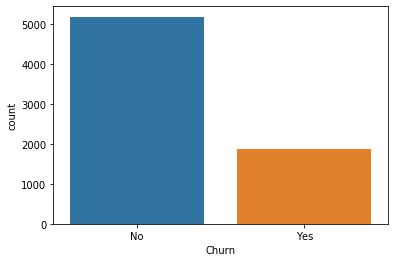

In [12]:
# Visualize the count of customer churn

sns.countplot(df['Churn'])
plt.show()

In [21]:
# Percentage of customers that are leaving

# numRetained = df[df.Churn == 'No'].shape[0]
# numChurned = df[df.Churn == 'Yes'].shape[0]

numRetained = df.groupby("Churn").size()["No"]
numChurned = df.groupby("Churn").size()["Yes"]

# Percentage of customers that stayed
print(round(numRetained/(numRetained + numChurned) * 100,2),'% of customers stayed in the company')

# Percentage of customers that left
print(round(numChurned/(numRetained + numChurned) * 100,2), '% of customers left with the company')

73.46 % of customers stayed in the company
26.54 % of customers left with the company


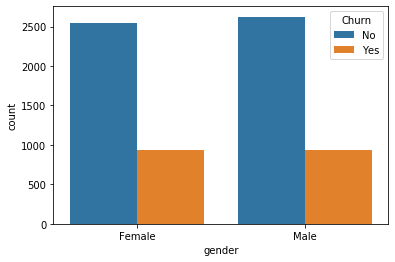

In [22]:
# Visualize the churn count for both males and females

sns.countplot(x ='gender', hue='Churn', data=df)
plt.show()

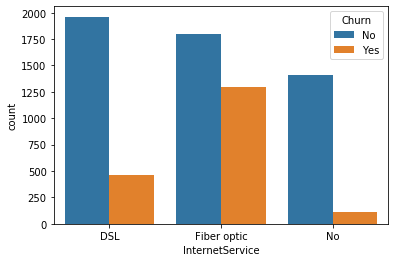

In [23]:
# Visualize the churn count for the internet service

sns.countplot(x='InternetService', hue='Churn', data=df)
plt.show()

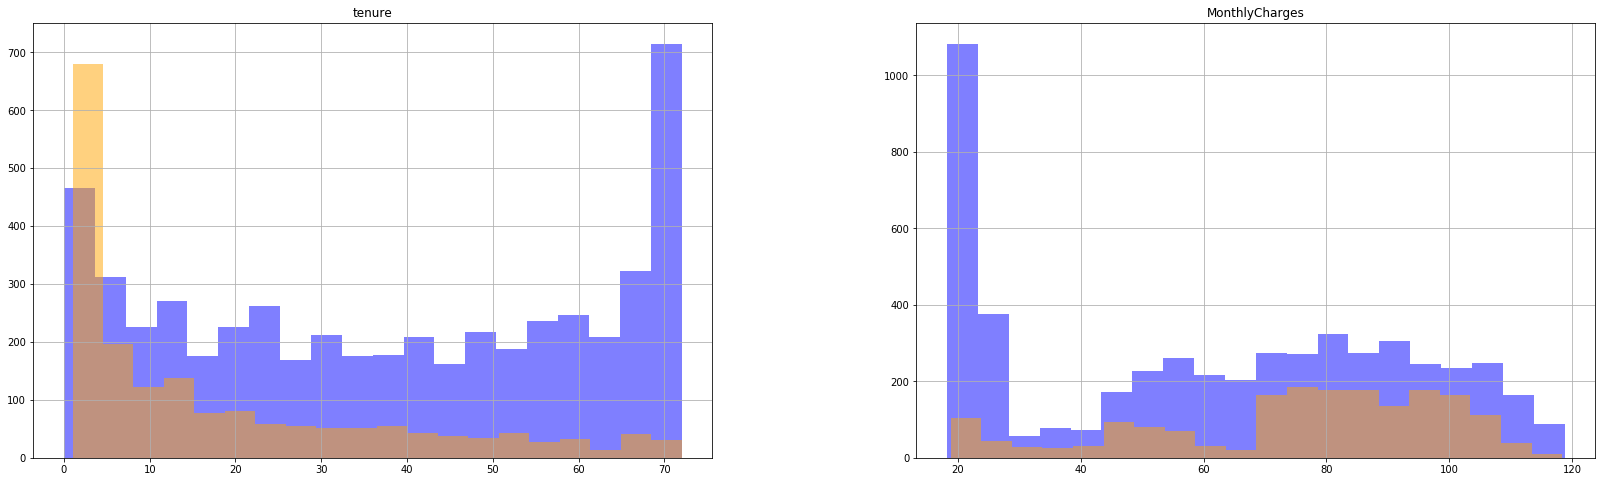

In [25]:
# Visualize Numeric data

numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28, 8))

df[df.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

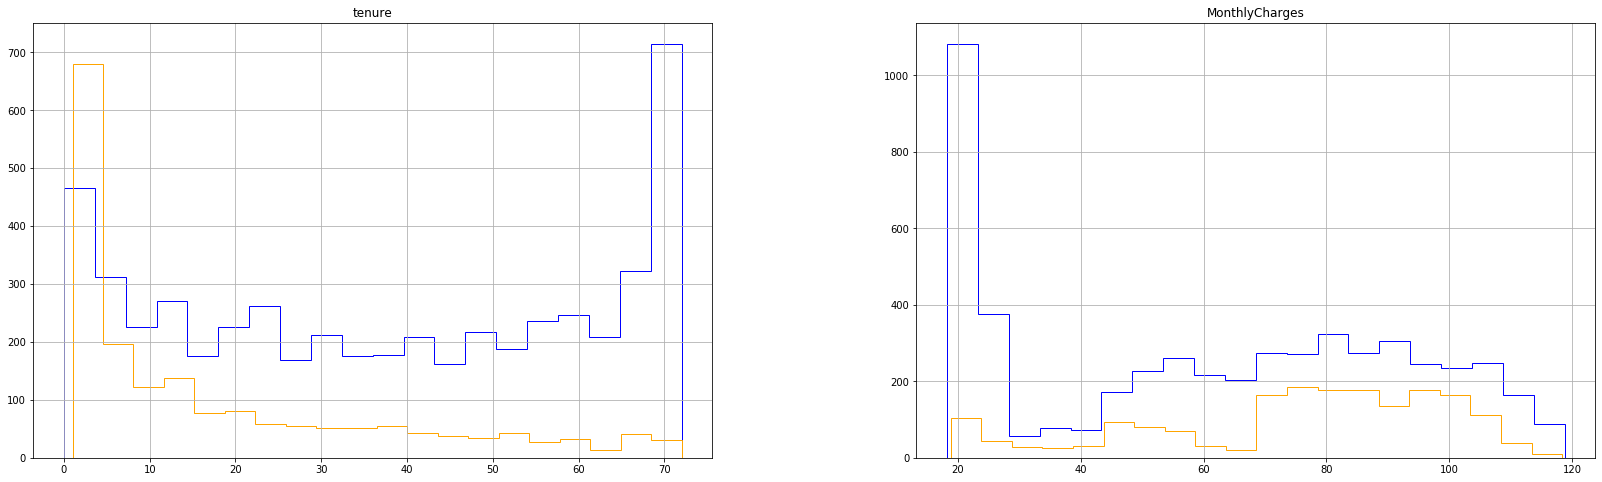

In [27]:
# Visualize Numeric data

numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28, 8))

df[df.Churn == "No"][numericFeatures].hist(bins=20, color='blue', ax=ax, histtype = "step")
df[df.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', ax=ax, histtype = "step")
plt.show()

In [28]:
# Remove unnecessary column(s)

cleanDF = df.drop('customerID', axis=1)

In [59]:
# Convert all the non-numeric columns to numeric

from sklearn.preprocessing import LabelEncoder

for column in cleanDF.columns:
    if cleanDF[column].dtype == np.number:
        continue
    cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column]) # cleanDF.select_dtypes("object").astype("category")[column].cat.codes
    
# We can also use pd.get_dummies(cleanDF[column]) to imporve accuracy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


In [60]:
# Show data types

cleanDF.info() # cleanDF.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [61]:
cleanDF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [62]:
# Scaled the data

from sklearn.preprocessing import StandardScaler # or MinMaxScaler

x = cleanDF.drop('Churn', axis=1)
y = cleanDF['Churn']

x = StandardScaler().fit_transform(x)

In [63]:
# Split the data into 80% training and 20% testing

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [64]:
# Create and Train the model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Train the model
model.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
# Predictions on the test data

predictions = model.predict(xtest)

print(predictions)

[1 0 0 ... 0 0 0]


In [66]:
# Check the precision, recall and f1-score

from sklearn.metrics import classification_report

print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

